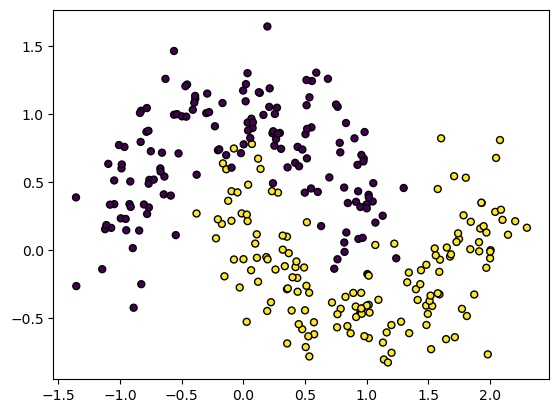

In [13]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X1, Y1 = make_moons(n_samples = 300, noise=0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')

In [7]:
import torch
from torch import nn

In [ ]:
input_size = 2
hiden_size = 8
output_size = 1

net = nn.Sequential(nn.Linear(in_features= input_size ,out_features=hiden_size), #Escondida
                    nn.ReLU(), #Ativacao nao linear
                    nn.Linear(in_features=hiden_size , out_features = output_size)) #Saida
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


In [11]:
from torchsummary import summary
summary(net, input_size=(1, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [15]:
#Foward, necessario tranformar a entrada em tensor
tensor = torch.from_numpy(X1).float()
pred = net(tensor)
print(pred.size())

torch.Size([300, 1])


In [21]:
class MinhaRede(nn.Module):
    #Definir a arquitetura
    def __init__(self, input_size, hidden_size, output_size):
        super(MinhaRede, self).__init__()

        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)
    #Gerar uma saida a aprtir do x
    def forward(self, X):
        hidden = self.relu(self.hidden(X))
        output = self.output(hidden)

        return output

In [22]:
input_size = 2
hidden_size = 8
output_size = 1
net = MinhaRede(input_size, hidden_size, output_size)
print(net)

MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


In [23]:
tensor = torch.from_numpy(X1).float()
pred = net(tensor)
print(pred.size())

torch.Size([300, 1])
